# Data Loading

In [7]:
import sys
import cv2
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Data Loading
with (np.load("mnist-data.npz") as data_mnist, np.load(f"spam-data.npz") as data_spam):
	data = {
		'mnist' : {
			'training_data': data_mnist['training_data'],
			'training_labels' : data_mnist['training_labels'],
			'test': data_mnist['test_data']
		},
		'spam': {
			'training_data': data_spam['training_data'],
			'training_labels' : data_spam['training_labels'],
			'test': data_spam['test_data']
		}
	}

# Data Partitioning
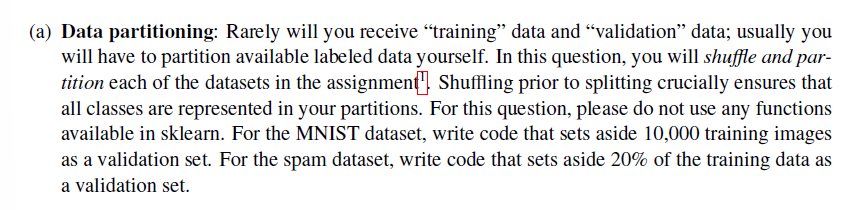

In [8]:
def data_partitioning(test_size, training_data, training_labels):

	# Shuffling
	shuffled_indices = np.random.permutation(len(training_data))
	shuffled_training = training_data[shuffled_indices]
	shuffled_labels = training_labels[shuffled_indices]

	# Partitioning
    split_index = int(len(shuffled_training) * test_size)

	training_set = {
		'data': shuffled_training[split_index:],
		'labels': shuffled_labels[split_index:]
	}

	validation_set = {
		'data': shuffled_training[:split_index],
		'labels': shuffled_labels[:split_index]
	}

	return training_set, validation_set

# Evaluation Metric
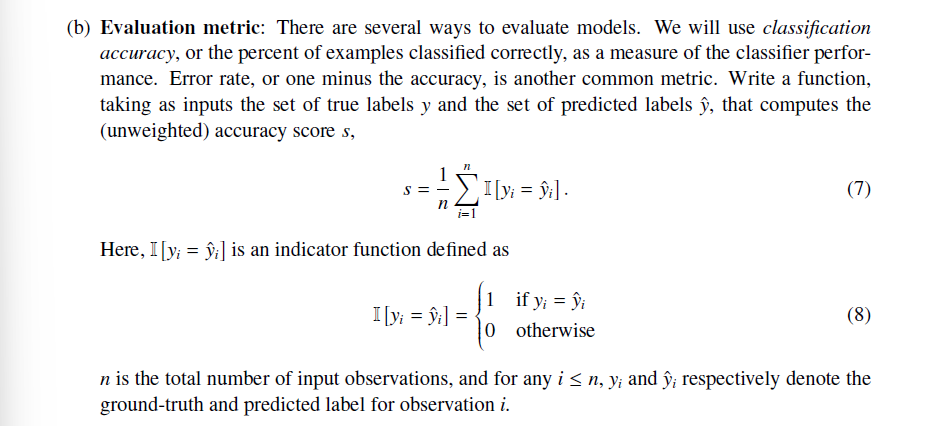

In [11]:
def evaluation_metric(ground_labels, predicted_labels):
	if len(ground_labels) != len(predicted_labels):
		raise ValueError('Different dimensions')

	return np.mean(ground_labels == predicted_labels)

# Data Preprocessing

In [13]:
def preprocess_data(raw_data, scaler=None):
	reshaped_data = raw_data.reshape(raw_data.shape[0], -1)
	if scaler is None:
		scaler = StandardScaler()
		scaled_data = scaler.fit_transform(reshaped_data)
	else:
		scaled_data = scaler.transform(reshaped_data)
	return scaled_data, scaler

# Accuracy Plot

In [15]:
def accuracy_plot(x_values, training_accuracy_list, validation_accuracy_list, plot_info):
    
    plt.figure(figsize=(10, 6))

    if training_accuracy_list:
        plt.semilogx(x_values, training_accuracy_list, 'b-o', label='training accuracy')
	
    if validation_accuracy_list:
        plt.semilogx(x_values, validation_accuracy_list, 'r-o', label='validation accuracy')

    plt.title(plot_info['title'])

    plt.xlabel(plot_info['x_label'])
    plt.ylabel(plot_info['y_label'])
    
    plt.legend()
    
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

# Classifier 
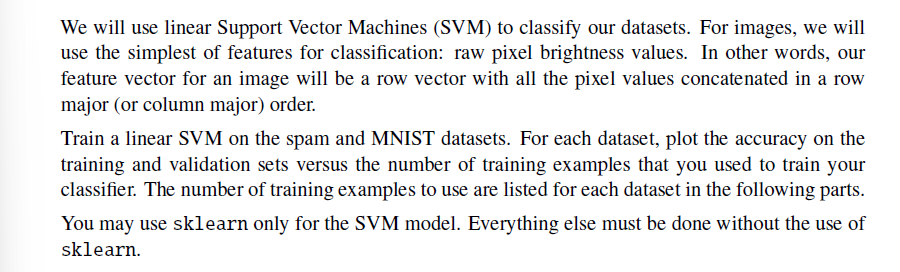

In [17]:
def classify(training_set,  c=1.0):
    
	clf = svm.SVC(kernel='linear', C=c)
	clf.fit(training_set['data'], training_set['labels'])
	return clf

## MNIST dataset
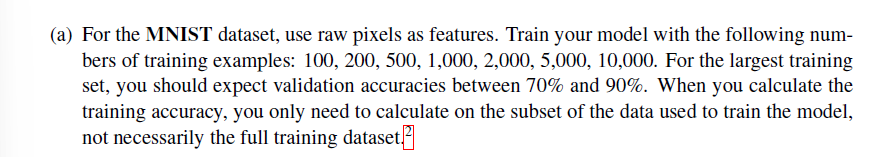

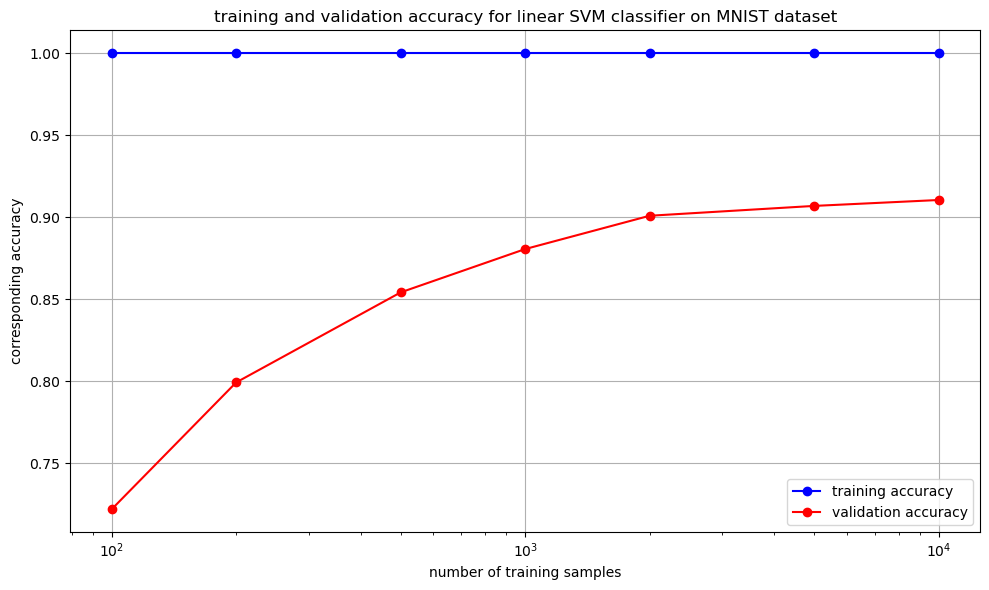

In [136]:
mnist_x = [100, 200, 500, 1000, 2000, 5000, 10000]

training_set, validation_set = data_partitioning(0.166, 
                                                 data['mnist']['training_data'], 
                                                 data['mnist']['training_labels'])
training_accuracy_list = []
validation_accuracy_list = []

preprocessed_training, scaler = preprocess_data(training_set['data'])
preprocessed_validation, _ = preprocess_data(validation_set['data'], scaler)


for split_index in mnist_x:
        split_training_set = {
    		'data':   preprocessed_training[:split_index],
    		'labels': training_set['labels'][:split_index]
    	}
        mnist_clf = classify(split_training_set)
    
        training_predictions = mnist_clf.predict(split_training_set['data'])
        validation_predictions = mnist_clf.predict(preprocessed_validation)
    
        training_accuracy_list.append(evaluation_metric(split_training_set['labels'],
                                                        training_predictions))
        validation_accuracy_list.append(evaluation_metric(validation_set['labels'],
                                                          validation_predictions))

plot_info = {
    'title': 'training and validation accuracy for linear SVM classifier on MNIST dataset' ,
    'x_label': 'number of training samples' ,
    'y_label': 'corresponding accuracy'
}

accuracy_plot(mnist_x, training_accuracy_list, validation_accuracy_list, plot_info)

# SPAM dataset

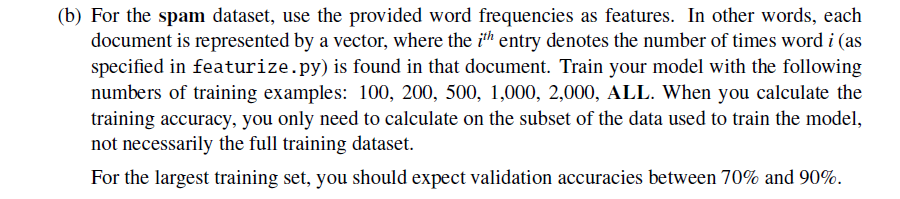

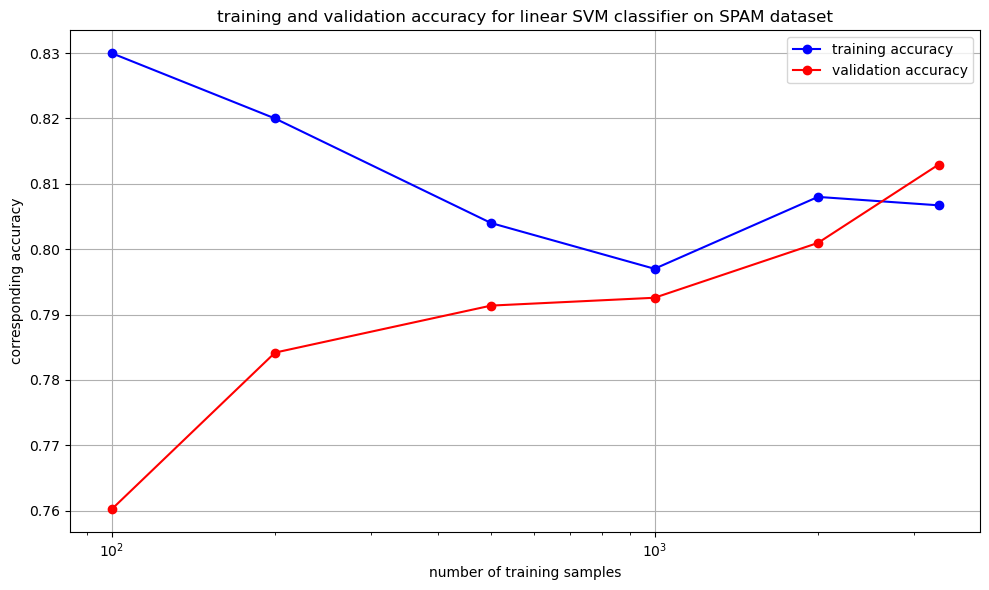

In [137]:

training_set, validation_set = data_partitioning(0.2, 
                                                 data['spam']['training_data'], 
                                                 data['spam']['training_labels'])

spam_x = [100, 200, 500, 1000, 2000, len(training_set['data'])]

training_accuracy_list = []
validation_accuracy_list = []

preprocessed_training, scaler = preprocess_data(training_set['data'])
preprocessed_validation, _ = preprocess_data(validation_set['data'], scaler)


for split_index in spam_x:
        split_training_set = {
    		'data':   preprocessed_training[:split_index],
    		'labels': training_set['labels'][:split_index]
    	}
        mnist_clf = classify(split_training_set)
    
        training_predictions = mnist_clf.predict(split_training_set['data'])
        validation_predictions = mnist_clf.predict(preprocessed_validation)
    
        training_accuracy_list.append(evaluation_metric(split_training_set['labels'],
                                                        training_predictions))
        validation_accuracy_list.append(evaluation_metric(validation_set['labels'],
                                                          validation_predictions))

plot_info = {
    'title': 'training and validation accuracy for linear SVM classifier on SPAM dataset' ,
    'x_label': 'number of training samples' ,
    'y_label': 'corresponding accuracy'
}

accuracy_plot(spam_x, training_accuracy_list, validation_accuracy_list, plot_info)

# Hyperparameter Tuning

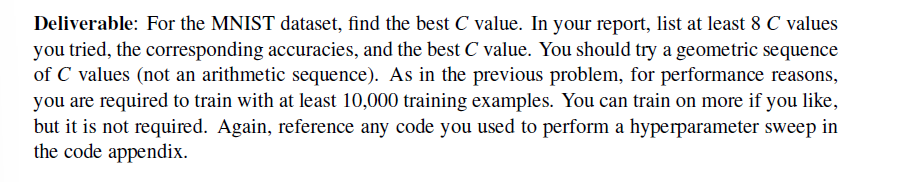

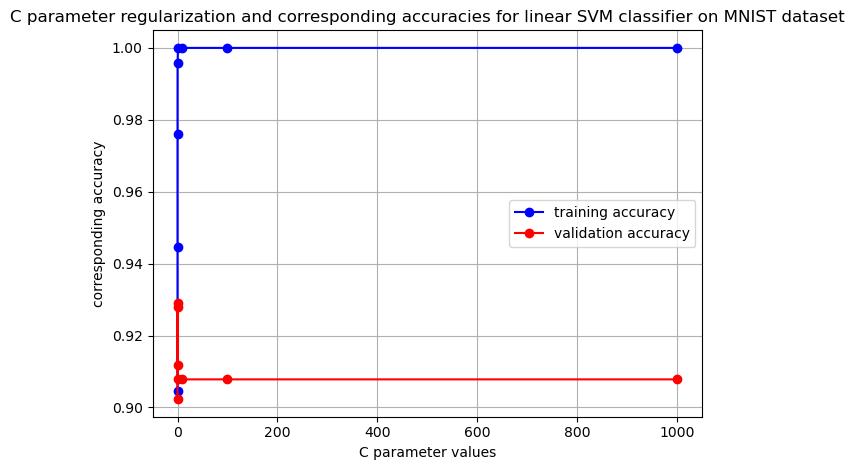

In [114]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

training_set, validation_set = data_partitioning(0.166, 
                                                 data['mnist']['training_data'], 
                                                 data['mnist']['training_labels'])
training_accuracy_list = []
validation_accuracy_list = []

preprocessed_training, scaler = preprocess_data(training_set['data'])
preprocessed_validation, _ = preprocess_data(validation_set['data'], scaler)

split_training_set = {
    'data':   preprocessed_training[:10000],
    'labels': training_set['labels'][:10000]
}
for c in c_values:
        mnist_clf = classify(split_training_set, c)
    
        training_predictions = mnist_clf.predict(split_training_set['data'])
        validation_predictions = mnist_clf.predict(preprocessed_validation)
    
        training_accuracy_list.append(evaluation_metric(split_training_set['labels'],
                                                        training_predictions))
        validation_accuracy_list.append(evaluation_metric(validation_set['labels'],
                                                          validation_predictions))

plot_info = {
    'title': "C parameter regularization and corresponding accuracies for linear SVM classifier on MNIST dataset",
    'x_label': 'C parameter values' ,
    'y_label': 'corresponding accuracy'
}

accuracy_plot(c_values, training_accuracy_list, validation_accuracy_list, plot_info)

# K-Fold Cross-Validation

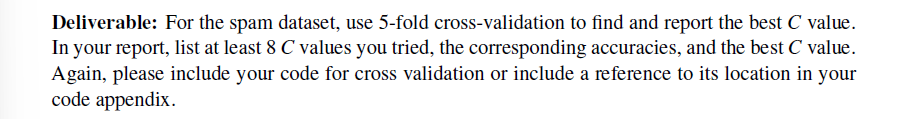

In [3]:
def k_fold_cross_validation(k, training_data, training_labels, c):
    # Shuffling
    shuffled_indices = np.random.permutation(len(training_data))
    shuffled_training_data = training_data[shuffled_indices]
    shuffled_training_labels = training_labels[shuffled_indices]

    
    # Partitioning
    k_split_data = np.array_split(shuffled_training_data, k)
    k_split_labels = np.array_split(shuffled_training_labels, k)
    
    accuracies = []
        
    for i in range(k):
        train_data = np.concatenate([fold for j, fold in enumerate(k_split_data) if j != i])
        train_labels = np.concatenate([fold for j, fold in enumerate(k_split_labels) if j != i])

        preprocessed_train_data, scaler = preprocess_data(train_data)
        
        validation_data, _ = preprocess_data(k_split_data[i], scaler)
        validation_labels = k_split_labels[i]
        
        # train
        spam_clf = classify({
            'data': preprocessed_train_data ,
            'labels': train_labels
        }, c)
        
        # Evaluate the model
        accuracy = evaluation_metric(validation_labels,
                                   spam_clf.predict(validation_data))
        accuracies.append(accuracy)
        
    return np.mean(accuracies)

In [ ]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

validation_accuracy_list = []

for c_parameter in c_values:
        validation_accuracy_list.append(k_fold_cross_validation(5, 
                                                                data['spam']['training_data'],
                                                                data['spam']['training_labels'],
                                                                c_parameter))
    

plot_info = {
    'title': "C parameter regularization and corresponding accuracies for linear SVM classifier on SPAM dataset",
    'x_label': 'C parameter values' ,
    'y_label': 'corresponding accuracy'
}

accuracy_plot(c_values, validation_accuracy_list, plot_info, training_accuracy_list = None)